In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dir_ = 'votacao/'

file_name = 'camara_municipal_sp_sessoes_12_20.csv'

file_dir = dir_ + file_name

In [47]:
df = pd.read_csv(file_dir)

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


# Datasets

## Votação

In [48]:
df

,vereador,partido,id_parlamentar,voto,id_votacao,tipo_votacao,materia,ementa,resultado,presentes,votacao_sim,votacao_nao,votacao_abstencao,votacao_branco,notas,sessao,data
0,ADILSON AMADEU,PTB,1296.0,Não,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
1,ADOLFO QUINTAS,PSDB,1310.0,Sim,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
2,ALFREDINHO,PT,1447.0,Não,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
3,ANIBAL DE FREITAS FILHO,PSDB,1667.0,Sim,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
4,ARSELINO TATTO,PT,155.0,Não,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62273,SOUZA SANTOS,REPUBLICANOS,1633.0,Sim,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62274,TONINHO PAIVA,PL,220.0,Sim,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62275,TONINHO VESPOLI,PSOL,1999.0,Não,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62276,XEXÉU TRIPOLI,PSDB,2158.0,Sim,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62278 entries, 0 to 62277
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vereador           58509 non-null  object 
 1   partido            58509 non-null  object 
 2   id_parlamentar     58509 non-null  float64
 3   voto               58509 non-null  object 
 4   id_votacao         62278 non-null  int64  
 5   tipo_votacao       62278 non-null  object 
 6   materia            62264 non-null  object 
 7   ementa             39943 non-null  object 
 8   resultado          61954 non-null  object 
 9   presentes          58513 non-null  float64
 10  votacao_sim        58513 non-null  float64
 11  votacao_nao        58513 non-null  float64
 12  votacao_abstencao  58513 non-null  float64
 13  votacao_branco     58513 non-null  float64
 14  notas              23676 non-null  object 
 15  sessao             62278 non-null  object 
 16  data               622

In [50]:
df.describe()

,id_parlamentar,id_votacao,presentes,votacao_sim,votacao_nao,votacao_abstencao,votacao_branco
count,58509.000000,6.227800e+04,58513.000000,58513.000000,58513.000000,58513.000000,58513.0
mean,1412.584901,9.297417e+05,47.561875,24.323518,12.738913,0.349734,0.0
std,678.754530,2.874633e+07,6.262188,15.813804,12.616398,1.131837,0.0
min,132.000000,1.000000e+00,20.000000,0.000000,0.000000,0.000000,0.0
25%,936.000000,1.536000e+03,44.000000,8.000000,1.000000,0.000000,0.0
50%,1634.000000,1.987000e+03,49.000000,29.000000,8.000000,0.000000,0.0
75%,1993.000000,2.467000e+03,52.000000,37.000000,26.000000,0.000000,0.0
max,2203.000000,9.876543e+08,55.000000,51.000000,45.000000,17.000000,0.0


# Creating network

In [51]:
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import math

In [52]:
# Caminho para as pastas de read e save"
dir_save = "networks/"

dir_two_mode = "two-mode/"

# Nome do dataset
file_save_name = "vereadores"

# Extensões dos arquivos 
file_save_extension = ".net.gz"

# Diretório para save
path_save_two = dir_save + dir_two_mode + file_save_name + file_save_extension
# Diretório para o grafo
path_graph_two = dir_save + dir_two_mode + file_save_name + "_graph" + file_save_extension

# Diretório para save
path_save = dir_save  + file_save_name + file_save_extension
# Diretório para o grafo
path_graph = dir_save + file_save_name + "_graph" + file_save_extension


betweenness_file = dir_save + file_save_name + "_betweenness" + file_save_extension
clustering_file = dir_save + file_save_name + "_clustering" + file_save_extension

##DATA
data_dir = "data/"
data_networks_path = data_dir + "data_networks.csv"
data_path = data_dir + "vereadores.csv"

## Dataframe com pesos

In [53]:
df_weighted = df[df['id_parlamentar'].notna() & df['voto'].notna() & df['id_votacao'].notna()].copy()
df_weighted.loc[df_weighted['voto'] == 'Sim', 'voto'] = '1'
df_weighted.loc[df_weighted['voto'] == 'Não', 'voto'] = '2'
df_weighted.loc[df_weighted['voto'] == 'Abstenção', 'voto'] = '0'
df_weighted

,vereador,partido,id_parlamentar,voto,id_votacao,tipo_votacao,materia,ementa,resultado,presentes,votacao_sim,votacao_nao,votacao_abstencao,votacao_branco,notas,sessao,data
0,ADILSON AMADEU,PTB,1296.0,2,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
1,ADOLFO QUINTAS,PSDB,1310.0,1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
2,ALFREDINHO,PT,1447.0,2,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
3,ANIBAL DE FREITAS FILHO,PSDB,1667.0,1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
4,ARSELINO TATTO,PT,155.0,2,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62273,SOUZA SANTOS,REPUBLICANOS,1633.0,1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62274,TONINHO PAIVA,PL,220.0,1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62275,TONINHO VESPOLI,PSOL,1999.0,2,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62276,XEXÉU TRIPOLI,PSDB,2158.0,1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020


In [54]:
df_clear_idx = list(x.isdigit() for x in df_weighted['voto'])
df_clear = df_weighted[df_clear_idx].copy()
df_clear.loc[df_clear['voto'] == '2', 'voto'] = '-1'
df_clear = df_clear.astype({'voto': 'int64'})
df_clear

,vereador,partido,id_parlamentar,voto,id_votacao,tipo_votacao,materia,ementa,resultado,presentes,votacao_sim,votacao_nao,votacao_abstencao,votacao_branco,notas,sessao,data
0,ADILSON AMADEU,PTB,1296.0,-1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
1,ADOLFO QUINTAS,PSDB,1310.0,1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
2,ALFREDINHO,PT,1447.0,-1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
3,ANIBAL DE FREITAS FILHO,PSDB,1667.0,1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
4,ARSELINO TATTO,PT,155.0,-1,1108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62273,SOUZA SANTOS,REPUBLICANOS,1633.0,1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62274,TONINHO PAIVA,PL,220.0,1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62275,TONINHO VESPOLI,PSOL,1999.0,-1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62276,XEXÉU TRIPOLI,PSDB,2158.0,1,2922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020


In [ ]:
df_clear["ano"] = df_clear.apply(lambda row: int(row["data"][-4:]), axis=1)
idx = (df_clear["ano"] > 2012)
df_cortes = df_clear[idx].copy()
df_cortes.loc[df_cortes['ano'] < 2017, 'ano'] = 0
df_cortes.loc[df_cortes['ano'] > 0, 'ano'] = 1
df_cortes

### Tratando ids covergentes (votacao e parlamentar)

In [55]:
cte = int(1e5)
df_cortes['id_votacao'] = df_cortes['id_votacao'] + cte
df_cortes

,vereador,partido,id_parlamentar,voto,id_votacao,tipo_votacao,materia,ementa,resultado,presentes,votacao_sim,votacao_nao,votacao_abstencao,votacao_branco,notas,sessao,data
0,ADILSON AMADEU,PTB,1296.0,-1,101108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
1,ADOLFO QUINTAS,PSDB,1310.0,1,101108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
2,ALFREDINHO,PT,1447.0,-1,101108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
3,ANIBAL DE FREITAS FILHO,PSDB,1667.0,1,101108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
4,ARSELINO TATTO,PT,155.0,-1,101108,Nominal,Encerramento da Sessão,NaN,Aprovado,51.0,27.0,8.0,0.0,0.0,NaN,371ª Sessão Ordinária,01/08/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62273,SOUZA SANTOS,REPUBLICANOS,1633.0,1,102922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62274,TONINHO PAIVA,PL,220.0,1,102922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62275,TONINHO VESPOLI,PSOL,1999.0,-1,102922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020
62276,XEXÉU TRIPOLI,PSDB,2158.0,1,102922,Nominal,"Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...",Estima a receita e fixa a despesa do Municípi...,Aprovado,55.0,37.0,12.0,0.0,0.0,FASE: 2ª DO SUBSTITUTIVO Nº 1 DA COMISSÃO DE F...,300ª Sessão Extraordinária,23/12/2020


In [57]:
df_cortes.to_csv(data_path)

## Two-Mode (Votação x Vereador)

In [12]:
cols = list(df_clear.columns)
voto_idx =  cols.index("voto")
votacao_idx =  cols.index("id_votacao")
id_parlamentar_idx = cols.index("id_parlamentar")

In [13]:
g = Graph(directed=False)

In [14]:
g.add_ep("voto")
g.add_ep("type")

In [15]:
for i in df_clear.values:
    votacao = int(i[votacao_idx])
    vereador = int(i[id_parlamentar_idx])
    try:
        g.add_vertex(votacao)
        votacao["type"] = "votacao"
    except:
        pass
    try:
        g.add_vertex(vereador)
        vereador["type"] = "vereador"
    except:
        pass
    try:
        g.add_edge(vereador, votacao)
    except:
        pass
    edge = g.get_edge(vereador, votacao)
    edge["voto"] = i[voto_idx]

In [17]:
gt_save(g, path_save_two)


### Brute force

In [18]:
g = gt_load(path_save_two)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, path_graph_two)

In [19]:
r_two = netpixi.render(path_graph_two)

In [33]:
# mudar a cor de fundo do grafo
r_two.graph(color = 0x000002, kscale = 2)

# mudar a cor e o tamanho dos vértices
r_two.vertex_default(color = 0x03FF07, size = 4)

# configurando arestas
r_two.edge_default(color = 0x48FA22, width = 0.01, curve1 = 1, curve2 = 2)

## One Mode (Vereadores)

In [12]:
vereadores = np.unique(df_clear['id_parlamentar'])
votacoes = np.unique(df_clear['id_votacao'])

n_vereadores = len(vereadores)
n_votacoes = len(votacoes)

In [13]:
vereadores_votos = []
for i in range(n_vereadores):
    votes = df_clear[df_clear['id_parlamentar'] == vereadores[i]][['id_votacao', 'voto']]
    vereadores_votos.append(votes)
vereadores_votos[0]

,id_votacao,voto
180,101083,1
227,101109,1
277,101110,1
278,101110,0
366,101122,1
...,...,...
41283,102342,1
41408,102315,-1
41449,102316,1
41524,102348,1


In [14]:
vereadores_corr = np.zeros(shape=(n_vereadores, n_vereadores))
list_vereadores_corr = []

for i in range(n_vereadores):
    v1 = vereadores_votos[i]
    for j in range(i+1, n_vereadores - 1):
        v2 = vereadores_votos[j]
        corrs = (
                v1.merge(v2,how='inner', on = 'id_votacao')
                .drop(['id_votacao'], axis = 1)
                .corr(numeric_only = False)
               )
        corr = corrs['voto_x']['voto_y']
        if math.isnan(corr):
            corr = 0
        vereadores_corr[i][j] = corr
        list_vereadores_corr.append(corr)

### Análise visual

A ideia é fazer uma dicotimização para escolher apenas as ligacões "fortes"

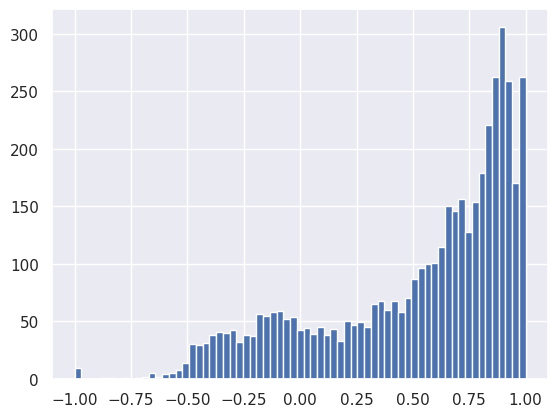

In [15]:
list_vereadores_corr = [i for i in list_vereadores_corr if i != 0]
plt.hist(list_vereadores_corr, bins = int(np.sqrt(len(list_vereadores_corr))));

In [25]:
cut_point = np.median(list_vereadores_corr)
cut_point

0.6693419514856722

In [26]:
g = Graph(directed=False)

In [27]:
for i in range(n_vereadores):
    g.add_vertex(int(vereadores[i]))
    
for i in range(n_vereadores):    
    for j in range(i+1, n_vereadores - 1):
        corr = vereadores_corr[i][j]
        if corr > cut_point:
            g.add_edge(int(vereadores[i]), int(vereadores[j]))
gt_save(g, path_save)

### Brute force

In [28]:
g = gt_load(path_save)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, path_graph)

In [16]:
r = netpixi.render(path_graph)

In [17]:
# mudar a cor de fundo do grafo
r.graph(color = 0x000002, kscale = 2)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color = 0x03FF07, size = 4)

# configurando arestas
r.edge_default(color = 0x48FA22, width = 0.1, curve1 = 1, curve2 = 2)

# Centralidades

In [20]:
from graph_tool import centrality, clustering

## Betweenness

In [15]:
g_betweenness =gt_load(path_save)
bc, _ = centrality.betweenness(g_betweenness)
g_betweenness.add_vp('betweenness', bc)
gt_save(g_betweenness, betweenness_file)

In [16]:
r = netpixi.render(betweenness_file)

In [18]:
# Scalling pra betweenness
r.vertex_scale('betweenness', 1, 50)
# mudar a cor de fundo do grafo
r.graph(color = 0x000002, kscale = 2)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color = 0x03FF07, size = 4)

# configurando arestas
r.edge_default(color = 0x48FA22, width = 0.1, curve1 = 1, curve2 = 2)

## Clustering 

In [24]:
g_cluster = gt_load(path_save)
lc =  clustering.local_clustering(g_cluster)
g_cluster.add_vp('clustering', lc)
gt_save(g_cluster, clustering_file)

In [25]:
r = netpixi.render(clustering_file)

In [34]:
# Scalling pra betweenness
r.vertex_scale('clustering', 1, 35)
# mudar a cor de fundo do grafo
r.graph(color = 0x000002, kscale = 2)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color = 0x03FF07, size = 4)

# configurando arestas
r.edge_default(color = 0x48FA22, width = 0.1, curve1 = 1, curve2 = 2)

In [38]:
data_cluster = gt_data(g_betweenness)
data_bet = gt_data(g_cluster)
data = data_bet.merge(data_cluster, how='inner', on = 'id')

,clustering,betweenness
id,,
132,0.725689,0.004153
155,0.720773,0.008869
160,0.803030,0.002141
164,0.519481,0.004959
176,0.744186,0.002169
...,...,...
2174,0.384615,0.011307
2180,1.000000,0.000000
2185,0.575758,0.005331


In [58]:
data.to_csv(data_networks_path)